In [176]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pandas as pd
from IPython.display import display

In [177]:
import csv
import numpy as np

class IrisData:
    def __init__(self, data, target, labels):
        self.data = data
        self.target = target
        self.labels = labels

def load_iris_data():
    data = []
    labels = []
    target = []

    with open('./iris/iris.data', newline='') as csvfile:
        data_reader = csv.reader(csvfile, delimiter=',')
        for row in data_reader:
            if len(row) != 0:
                if row[-1] not in labels:
                    labels.append(row[-1])
                
                target.append(labels.index(row[-1]))
                data.append([float(x) for x in row[:-1]])

    data = np.array(data)
    target = np.array(target)
    labels = np.array(labels)
    
    return IrisData(data, target, labels)

In [178]:
iris_data = load_iris_data()
print(iris_data.labels)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [179]:
clf = DecisionTreeClassifier(random_state=0)
print((iris_data.data[10]))
cross_val_score(clf, iris_data.data, iris_data.target, cv=10)

[5.4 3.7 1.5 0.2]


array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [180]:
def conduct_tests_tree(folds, scores_dict, random_states, params = None):
    res = {score_name: [] for score_name in scores_dict.keys()}

    for random_state in random_states:
        if params is None:
            clf = DecisionTreeClassifier(random_state=random_state)
        else:
            clf = DecisionTreeClassifier(random_state=random_state, **params)
        kf = KFold(n_splits=folds, shuffle=True, random_state=random_state)
        results = cross_validate(clf, iris_data.data, iris_data.target, scoring=scores_dict,
                                cv=kf)
        for score_name, score_values in results.items():
            if 'test_' in score_name:
                res[score_name[5:]].append(score_values)

    avg_scores = {}
    std_dev_scores = {}

    for score_name, score_values in res.items():
        scores_array = np.concatenate(score_values)
        avg_scores[score_name] = np.mean(scores_array)
        std_dev_scores[score_name] = np.std(scores_array)

    return avg_scores, std_dev_scores

In [181]:
RANDOM_STATES = [6, 5, 2024]
FOLDS_N = 5
SCORES_DICT = {'accuracy': 'accuracy',
                'precision': 'precision_macro', 
                'recall': 'recall_macro',
                'f1': 'f1_macro'}

Testing for default

In [182]:
test_res = conduct_tests_tree(FOLDS_N, SCORES_DICT, RANDOM_STATES)

for score_name in SCORES_DICT.keys():
    print(f"Average {score_name.capitalize()}: {test_res[0][score_name]:.3f} {test_res[1][score_name]:.3f}")
    #print(f"Standard Deviation of {score_name.capitalize()}: {test_res[1][score_name]:.3f}")

Average Accuracy: 0.942 0.045
Average Precision: 0.943 0.044
Average Recall: 0.944 0.045
Average F1: 0.940 0.046


In [183]:
PARAMETERS = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5, 10, 50, 100]
}

results_by_params = {}

for criterion_value in PARAMETERS['criterion']:
    for splitter_value in PARAMETERS['splitter']:
        for max_depth_value in PARAMETERS['max_depth']:
            results_for_params = []
            avg_scores, std_dev_scores = conduct_tests_tree(FOLDS_N, SCORES_DICT, RANDOM_STATES, {'criterion': criterion_value, 'splitter': splitter_value, 'max_depth': max_depth_value})
            for metric in avg_scores.keys():
                results_for_params.append({
                    'Criterion': criterion_value,
                    'Splitter': splitter_value,
                    'Max Depth': max_depth_value,
                    'Quality Metric': metric,
                    'Średnia': avg_scores[metric],
                    '$\\sigma$': std_dev_scores[metric]
                })

            results_df = pd.DataFrame(results_for_params)
            #results_df = results_df.pivot_table(index=['Criterion', 'Splitter', 'Max Depth'], columns='Quality Metric')
            results_by_params[(criterion_value, splitter_value, max_depth_value)] = results_df

# Display the results for each combination of parameters
#for params, results_df in results_by_params.items():
    #display(results_df)

# Concatenate all dataframes into one
all_results_df = pd.concat(results_by_params.values())

# Group by each parameter and calculate mean and standard deviation for each metric
#summary_df = all_results_df.groupby(['Criterion', 'Splitter', 'Max Depth']).agg({'Średnia': 'mean', '$\\sigma$': 'mean'})
summary_df = all_results_df
#summary_df = summary_df.map(lambda x: '{:.3f}'.format(x).replace('.', ','))
# Display the summary table
display(summary_df)


c:\Users\Kuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Kuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

,Criterion,Splitter,Max Depth,Quality Metric,Średnia,$\sigma$
0,gini,best,1,accuracy,0.633333,3.442652e-02
1,gini,best,1,precision,0.482334,1.594225e-02
2,gini,best,1,recall,0.666667,1.110223e-16
3,gini,best,1,f1,0.538758,1.569309e-02
0,gini,best,2,accuracy,0.937778,4.192881e-02
...,...,...,...,...,...,...
3,entropy,random,50,f1,0.952162,3.550153e-02
0,entropy,random,100,accuracy,0.953333,3.173968e-02
1,entropy,random,100,precision,0.952838,3.507407e-02
2,entropy,random,100,recall,0.955863,3.304213e-02


In [184]:
summary_df[summary_df['Quality Metric'] == 'f1'].sort_values(by=["Średnia"], ascending=False)
summary_df[(summary_df['Criterion'] == 'gini') & (summary_df['Splitter'] == 'random')  & (summary_df['Max Depth'] == 10)]


,Criterion,Splitter,Max Depth,Quality Metric,Średnia,$\sigma$
0,gini,random,10,accuracy,0.955556,0.031427
1,gini,random,10,precision,0.954797,0.034553
2,gini,random,10,recall,0.958888,0.032591
3,gini,random,10,f1,0.954544,0.035168


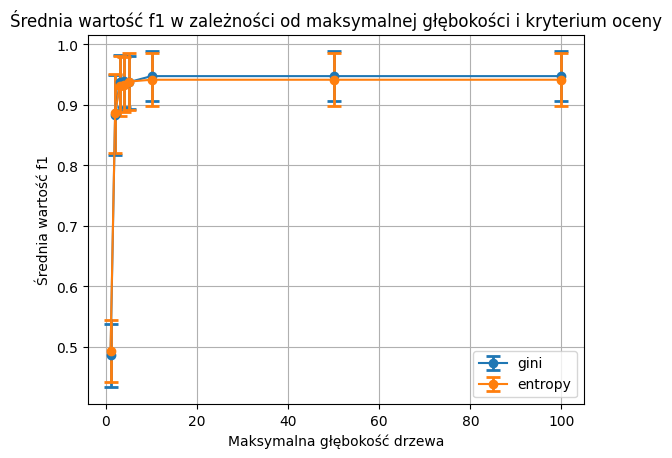

In [185]:
import matplotlib.pyplot as plt

plt.grid()
#plt.yscale("log")
# Plot results for each criterion
for criterion_value in PARAMETERS['criterion']:
    criterion_data = summary_df[summary_df['Criterion'] == criterion_value]
    f1_data = criterion_data[criterion_data['Quality Metric'] == 'f1']
    f1_data = f1_data.groupby(['Criterion', 'Max Depth']).agg({'Średnia': 'mean', '$\\sigma$': 'mean'})
    plt.errorbar(f1_data.index.get_level_values('Max Depth'), f1_data['Średnia'], yerr=f1_data['$\\sigma$'], label=f'{criterion_value}', fmt="-o",
                capsize=5,
                capthick=2,
                elinewidth=2,)

# Add labels and legend
plt.xlabel('Maksymalna głębokość drzewa')
plt.ylabel('Średnia wartość f1')
plt.title('Średnia wartość f1 w zależności od maksymalnej głębokości i kryterium oceny')
plt.legend()

# Show the plot
plt.show()


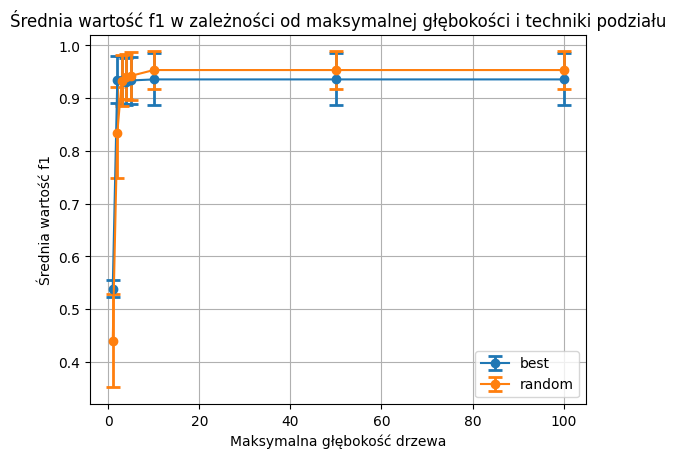

In [186]:
import matplotlib.pyplot as plt

plt.grid()
# Plot results for each splitter
for splitter_value in PARAMETERS['splitter']:
    splitter_data = summary_df[summary_df['Splitter'] == splitter_value]
    f1_data = splitter_data[splitter_data['Quality Metric'] == 'f1']
    f1_data = f1_data.groupby(['Splitter', 'Max Depth']).agg({'Średnia': 'mean', '$\\sigma$': 'mean'})
    plt.errorbar(f1_data.index.get_level_values('Max Depth'), f1_data['Średnia'], yerr=f1_data['$\\sigma$'], label=f'{splitter_value}', fmt="-o",
                capsize=5,
                capthick=2,
                elinewidth=2,)

# Add labels and legend
plt.xlabel('Maksymalna głębokość drzewa')
plt.ylabel('Średnia wartość f1')
plt.title('Średnia wartość f1 w zależności od maksymalnej głębokości i techniki podziału')
plt.legend()

# Show the plot
plt.show()


In [187]:
# Pivot the DataFrame for Criterion
criterion_df = summary_df.reset_index().pivot_table(index=['Criterion'], columns=['Quality Metric'], values=['Średnia', '$\\sigma$'], aggfunc='mean')
criterion_df.columns = criterion_df.columns.swaplevel(0, 1)
criterion_df = criterion_df.sort_index(axis=1)
criterion_df = criterion_df.map(lambda x: '{:.3f}'.format(x).replace('.', ','))
print(criterion_df.to_latex())
display(criterion_df)

# Pivot the DataFrame for Splitter
splitter_df = summary_df.reset_index().pivot_table(index='Splitter', columns=['Quality Metric'], values=['Średnia', '$\\sigma$'], aggfunc='mean')
splitter_df.columns = splitter_df.columns.swaplevel(0, 1)
splitter_df = splitter_df.sort_index(axis=1)
splitter_df = splitter_df.map(lambda x: '{:.3f}'.format(x).replace('.', ','))
print(splitter_df.to_latex())
display(splitter_df)

# Pivot the DataFrame for Max Depth
max_depth_df = summary_df.reset_index().pivot_table(index='Max Depth', columns=['Quality Metric'], values=['Średnia', '$\\sigma$'], aggfunc='mean')
max_depth_df.columns = max_depth_df.columns.swaplevel(0, 1)
max_depth_df = max_depth_df.sort_index(axis=1)
max_depth_df = max_depth_df.map(lambda x: '{:.3f}'.format(x).replace('.', ','))
print(max_depth_df.to_latex())
display(max_depth_df)

\begin{tabular}{lllllllll}
\toprule
Quality Metric & \multicolumn{2}{r}{accuracy} & \multicolumn{2}{r}{f1} & \multicolumn{2}{r}{precision} & \multicolumn{2}{r}{recall} \\
 & $\sigma$ & Średnia & $\sigma$ & Średnia & $\sigma$ & Średnia & $\sigma$ & Średnia \\
Criterion &  &  &  &  &  &  &  &  \\
\midrule
entropy & 0,048 & 0,891 & 0,049 & 0,876 & 0,041 & 0,878 & 0,046 & 0,896 \\
gini & 0,047 & 0,893 & 0,047 & 0,878 & 0,038 & 0,881 & 0,044 & 0,898 \\
\bottomrule
\end{tabular}



Quality Metric accuracy               f1         precision           recall  \
               $\sigma$ Średnia $\sigma$ Średnia  $\sigma$ Średnia $\sigma$   
Criterion                                                                     
entropy           0,048   0,891    0,049   0,876     0,041   0,878    0,046   
gini              0,047   0,893    0,047   0,878     0,038   0,881    0,044   

Quality Metric          
               Średnia  
Criterion               
entropy          0,896  
gini             0,898

\begin{tabular}{lllllllll}
\toprule
Quality Metric & \multicolumn{2}{r}{accuracy} & \multicolumn{2}{r}{f1} & \multicolumn{2}{r}{precision} & \multicolumn{2}{r}{recall} \\
 & $\sigma$ & Średnia & $\sigma$ & Średnia & $\sigma$ & Średnia & $\sigma$ & Średnia \\
Splitter &  &  &  &  &  &  &  &  \\
\midrule
best & 0,043 & 0,899 & 0,043 & 0,885 & 0,041 & 0,881 & 0,041 & 0,904 \\
random & 0,052 & 0,884 & 0,052 & 0,869 & 0,038 & 0,878 & 0,049 & 0,890 \\
\bottomrule
\end{tabular}



Quality Metric accuracy               f1         precision           recall  \
               $\sigma$ Średnia $\sigma$ Średnia  $\sigma$ Średnia $\sigma$   
Splitter                                                                      
best              0,043   0,899    0,043   0,885     0,041   0,881    0,041   
random            0,052   0,884    0,052   0,869     0,038   0,878    0,049   

Quality Metric          
               Średnia  
Splitter                
best             0,904  
random           0,890

\begin{tabular}{lllllllll}
\toprule
Quality Metric & \multicolumn{2}{r}{accuracy} & \multicolumn{2}{r}{f1} & \multicolumn{2}{r}{precision} & \multicolumn{2}{r}{recall} \\
 & $\sigma$ & Średnia & $\sigma$ & Średnia & $\sigma$ & Średnia & $\sigma$ & Średnia \\
Max Depth &  &  &  &  &  &  &  &  \\
\midrule
1 & 0,077 & 0,587 & 0,052 & 0,489 & 0,028 & 0,456 & 0,046 & 0,617 \\
2 & 0,059 & 0,894 & 0,066 & 0,885 & 0,042 & 0,919 & 0,058 & 0,894 \\
3 & 0,043 & 0,937 & 0,047 & 0,934 & 0,039 & 0,941 & 0,047 & 0,937 \\
4 & 0,041 & 0,938 & 0,044 & 0,936 & 0,041 & 0,940 & 0,042 & 0,940 \\
5 & 0,042 & 0,939 & 0,045 & 0,938 & 0,043 & 0,941 & 0,043 & 0,942 \\
10 & 0,039 & 0,946 & 0,042 & 0,944 & 0,041 & 0,946 & 0,041 & 0,948 \\
50 & 0,039 & 0,946 & 0,042 & 0,944 & 0,041 & 0,946 & 0,041 & 0,948 \\
100 & 0,039 & 0,946 & 0,042 & 0,944 & 0,041 & 0,946 & 0,041 & 0,948 \\
\bottomrule
\end{tabular}



Quality Metric accuracy               f1         precision           recall  \
               $\sigma$ Średnia $\sigma$ Średnia  $\sigma$ Średnia $\sigma$   
Max Depth                                                                     
1                 0,077   0,587    0,052   0,489     0,028   0,456    0,046   
2                 0,059   0,894    0,066   0,885     0,042   0,919    0,058   
3                 0,043   0,937    0,047   0,934     0,039   0,941    0,047   
4                 0,041   0,938    0,044   0,936     0,041   0,940    0,042   
5                 0,042   0,939    0,045   0,938     0,043   0,941    0,043   
10                0,039   0,946    0,042   0,944     0,041   0,946    0,041   
50                0,039   0,946    0,042   0,944     0,041   0,946    0,041   
100               0,039   0,946    0,042   0,944     0,041   0,946    0,041   

Quality Metric          
               Średnia  
Max Depth               
1                0,617  
2                0,894  
3                0,937  
4                0,940  
5                0,942  
10               0,948  
50               0,948  
100              0,948

In [205]:
def conduct_tests_svm(folds, scores_dict, random_states, params = None):
    res = {score_name: [] for score_name in scores_dict.keys()}

    for random_state in random_states:
        if params is None:
            clf = SVC(random_state=random_state)
        else:
            clf = SVC(random_state=random_state, **params, tol=10e-16)
        kf = KFold(n_splits=folds, shuffle=True, random_state=random_state)
        results = cross_validate(clf, iris_data.data, iris_data.target, scoring=scores_dict,
                                cv=kf)
        for score_name, score_values in results.items():
            if 'test_' in score_name:
                res[score_name[5:]].append(score_values)

    avg_scores = {}
    std_dev_scores = {}

    for score_name, score_values in res.items():
        scores_array = np.concatenate(score_values)
        avg_scores[score_name] = np.mean(scores_array)
        std_dev_scores[score_name] = np.std(scores_array)

    return avg_scores, std_dev_scores

In [206]:
test_res = conduct_tests_svm(FOLDS_N, SCORES_DICT, RANDOM_STATES)

for score_name in SCORES_DICT.keys():
    print(f"Average {score_name.capitalize()}: ${test_res[0][score_name]:.3f} \\pm {test_res[1][score_name]:.3f}$")
    #print(f"Standard Deviation of {score_name.capitalize()}: {test_res[1][score_name]}")

Average Accuracy: $0.962 \pm 0.034$
Average Precision: $0.961 \pm 0.035$
Average Recall: $0.962 \pm 0.035$
Average F1: $0.960 \pm 0.036$


In [207]:
PARAMETERS = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'max_iter': np.arange(1, 51, 5)
}

results_by_params = {}


for c_value in PARAMETERS['C']:
    for kernel_value in PARAMETERS['kernel']:
        for max_iter_value in PARAMETERS['max_iter']:
            results_for_params = []
            avg_scores, std_dev_scores = conduct_tests_svm(FOLDS_N, SCORES_DICT, RANDOM_STATES, {'C': c_value, 'kernel': kernel_value, 'max_iter': max_iter_value})
            for metric in avg_scores.keys():
                results_for_params.append({
                    'C': c_value,
                    'Kernel': kernel_value,
                    'Max iter': max_iter_value,
                    'Quality Metric': metric,
                    'Mean': avg_scores[metric],
                    'Std Dev': std_dev_scores[metric]
                })

            results_df = pd.DataFrame(results_for_params)
            #results_df = results_df.pivot_table(index=['Criterion', 'Splitter', 'Max Depth'], columns='Quality Metric')
            results_by_params[(c_value, kernel_value, max_iter_value)] = results_df

# Display the results for each combination of parameters
#for params, results_df in results_by_params.items():
#display(results_df)

# Concatenate all dataframes into one
all_results_df = pd.concat(results_by_params.values())

# Group by each parameter and calculate mean and standard deviation for each metric
#summary_df = all_results_df.groupby(['C', 'Kernel', 'Max iter']).agg({'Mean': 'mean', 'Std Dev': 'mean'})
summary_df = all_results_df
#summary_df = summary_df.map(lambda x: '{:.3f}'.format(x).replace('.', ','))
# Display the summary table
display(summary_df)

c:\Users\Kuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Kuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Kuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Kuba\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Kuba\AppDat

,C,Kernel,Max iter,Quality Metric,Mean,Std Dev
0,0.1,linear,1,accuracy,0.917778,0.048483
1,0.1,linear,1,precision,0.928238,0.042833
2,0.1,linear,1,recall,0.921724,0.045504
3,0.1,linear,1,f1,0.912680,0.055004
0,0.1,linear,6,accuracy,0.951111,0.034138
...,...,...,...,...,...,...
3,10.0,sigmoid,41,f1,0.091836,0.078691
0,10.0,sigmoid,46,accuracy,0.095556,0.064253
1,10.0,sigmoid,46,precision,0.114188,0.119718
2,10.0,sigmoid,46,recall,0.114980,0.071092


In [208]:
summary_df[summary_df['Quality Metric'] == 'f1'].sort_values(by=["Mean"], ascending=False)
summary_df[(summary_df['Kernel'] == 'linear') & (summary_df['C'] == 1.0) & (summary_df['Max iter'] == 31)]

,C,Kernel,Max iter,Quality Metric,Mean,Std Dev
0,1.0,linear,31,accuracy,0.982222,0.020608
1,1.0,linear,31,precision,0.981042,0.022933
2,1.0,linear,31,recall,0.982811,0.021284
3,1.0,linear,31,f1,0.981227,0.022505


In [209]:
# Pivot the DataFrame for Criterion
c_df = summary_df.reset_index().pivot_table(index='C', columns=['Quality Metric'], values=['Mean', 'Std Dev'], aggfunc='mean')
c_df.columns = c_df.columns.swaplevel(0, 1)
c_df = c_df.sort_index(axis=1)
c_df = c_df.map(lambda x: '{:.3f}'.format(x).replace('.', ','))
display(c_df)

# Pivot the DataFrame for Splitter
kernel_df = summary_df.reset_index().pivot_table(index='Kernel', columns=['Quality Metric'], values=['Mean', 'Std Dev'], aggfunc='mean')
kernel_df.columns = kernel_df.columns.swaplevel(0, 1)
kernel_df = kernel_df.sort_index(axis=1)
kernel_df = kernel_df.map(lambda x: '{:.3f}'.format(x).replace('.', ','))
display(kernel_df)

# Pivot the DataFrame for Max Depth
print(summary_df)
#max_iter_df = summary_df[summary_df['Kernel'] != 'sigmoid']
max_iter_df = summary_df.reset_index().pivot_table(index=['Max iter'], columns=['Quality Metric'], values=['Mean', 'Std Dev'], aggfunc='mean')
max_iter_df.columns = max_iter_df.columns.swaplevel(0, 1)
max_iter_df = max_iter_df.sort_index(axis=1)
max_iter_df = max_iter_df.map(lambda x: '{:.3f}'.format(x).replace('.', ','))
display(max_iter_df)

print(c_df.to_latex())
print(kernel_df.to_latex())
print(max_iter_df.to_latex())

Quality Metric accuracy             f1         precision         recall  \
                   Mean Std Dev   Mean Std Dev      Mean Std Dev   Mean   
C                                                                         
0.1               0,731   0,042  0,718   0,041     0,718   0,036  0,735   
1.0               0,737   0,041  0,723   0,038     0,722   0,035  0,741   
10.0              0,721   0,045  0,712   0,048     0,716   0,046  0,721   

Quality Metric          
               Std Dev  
C                       
0.1              0,042  
1.0              0,039  
10.0             0,045

Quality Metric accuracy             f1         precision         recall  \
                   Mean Std Dev   Mean Std Dev      Mean Std Dev   Mean   
Kernel                                                                    
linear            0,960   0,033  0,957   0,037     0,963   0,031  0,961   
poly              0,918   0,053  0,908   0,059     0,912   0,059  0,918   
rbf               0,953   0,036  0,950   0,040     0,955   0,035  0,954   
sigmoid           0,087   0,048  0,055   0,033     0,045   0,032  0,097   

Quality Metric          
               Std Dev  
Kernel                  
linear           0,034  
poly             0,053  
rbf              0,036  
sigmoid          0,045

       C   Kernel  Max iter Quality Metric      Mean   Std Dev
0    0.1   linear         1       accuracy  0.917778  0.048483
1    0.1   linear         1      precision  0.928238  0.042833
2    0.1   linear         1         recall  0.921724  0.045504
3    0.1   linear         1             f1  0.912680  0.055004
0    0.1   linear         6       accuracy  0.951111  0.034138
..   ...      ...       ...            ...       ...       ...
3   10.0  sigmoid        41             f1  0.091836  0.078691
0   10.0  sigmoid        46       accuracy  0.095556  0.064253
1   10.0  sigmoid        46      precision  0.114188  0.119718
2   10.0  sigmoid        46         recall  0.114980  0.071092
3   10.0  sigmoid        46             f1  0.091836  0.078691

[480 rows x 6 columns]


Quality Metric accuracy             f1         precision         recall  \
                   Mean Std Dev   Mean Std Dev      Mean Std Dev   Mean   
Max iter                                                                  
1                 0,664   0,078  0,621   0,073     0,628   0,072  0,660   
6                 0,713   0,052  0,704   0,057     0,713   0,042  0,712   
11                0,728   0,046  0,720   0,048     0,723   0,042  0,728   
16                0,731   0,039  0,726   0,038     0,727   0,036  0,731   
21                0,729   0,037  0,726   0,037     0,726   0,036  0,730   
26                0,731   0,030  0,728   0,030     0,728   0,029  0,732   
31                0,731   0,031  0,728   0,031     0,728   0,029  0,732   
36                0,732   0,033  0,728   0,032     0,728   0,030  0,733   
41                0,768   0,040  0,747   0,039     0,743   0,039  0,782   
46                0,768   0,039  0,748   0,037     0,743   0,037  0,783   

Quality Metric          
               Std Dev  
Max iter                
1                0,066  
6                0,052  
11               0,044  
16               0,038  
21               0,037  
26               0,031  
31               0,032  
36               0,033  
41               0,044  
46               0,042

\begin{tabular}{lllllllll}
\toprule
Quality Metric & \multicolumn{2}{r}{accuracy} & \multicolumn{2}{r}{f1} & \multicolumn{2}{r}{precision} & \multicolumn{2}{r}{recall} \\
 & Mean & Std Dev & Mean & Std Dev & Mean & Std Dev & Mean & Std Dev \\
C &  &  &  &  &  &  &  &  \\
\midrule
0.100000 & 0,731 & 0,042 & 0,718 & 0,041 & 0,718 & 0,036 & 0,735 & 0,042 \\
1.000000 & 0,737 & 0,041 & 0,723 & 0,038 & 0,722 & 0,035 & 0,741 & 0,039 \\
10.000000 & 0,721 & 0,045 & 0,712 & 0,048 & 0,716 & 0,046 & 0,721 & 0,045 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllllllll}
\toprule
Quality Metric & \multicolumn{2}{r}{accuracy} & \multicolumn{2}{r}{f1} & \multicolumn{2}{r}{precision} & \multicolumn{2}{r}{recall} \\
 & Mean & Std Dev & Mean & Std Dev & Mean & Std Dev & Mean & Std Dev \\
Kernel &  &  &  &  &  &  &  &  \\
\midrule
linear & 0,960 & 0,033 & 0,957 & 0,037 & 0,963 & 0,031 & 0,961 & 0,034 \\
poly & 0,918 & 0,053 & 0,908 & 0,059 & 0,912 & 0,059 & 0,918 & 0,053 \\
rbf & 0,953 & 0,036 & 0,950 & 0

     C   Kernel  Max iter Quality Metric      Mean   Std Dev
3  0.1   linear         1             f1  0.912680  0.055004
3  0.1   linear         6             f1  0.947833  0.038992
3  0.1   linear        11             f1  0.971807  0.027242
3  0.1   linear        16             f1  0.962881  0.042848
3  0.1   linear        21             f1  0.967367  0.036342
3  0.1   linear        26             f1  0.962808  0.034053
3  0.1   linear        31             f1  0.962808  0.034053
3  0.1   linear        36             f1  0.962808  0.034053
3  0.1   linear        41             f1  0.962808  0.034053
3  0.1   linear        46             f1  0.962808  0.034053
3  0.1     poly         1             f1  0.606192  0.136772
3  0.1     poly         6             f1  0.880191  0.086428
3  0.1     poly        11             f1  0.937067  0.073814
3  0.1     poly        16             f1  0.962099  0.044193
3  0.1     poly        21             f1  0.965747  0.035329
3  0.1     poly        2

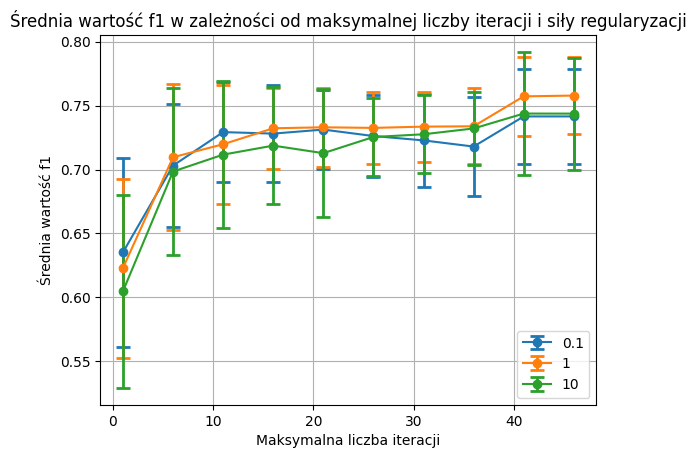

In [210]:
import matplotlib.pyplot as plt

plt.grid()
# Plot results for each splitter
for c_value in PARAMETERS['C']:
    c_data = summary_df[summary_df['C'] == c_value]
    f1_data = c_data[c_data['Quality Metric'] == 'f1']
    print(f1_data)
    f1_data = f1_data.groupby(['C', 'Max iter']).agg({'Mean': 'mean', 'Std Dev': 'mean'})
    plt.errorbar(f1_data.index.get_level_values('Max iter'), f1_data['Mean'], yerr=f1_data['Std Dev'], label=f'{c_value}', fmt="-o",
                capsize=5,
                capthick=2,
                elinewidth=2,)

# Add labels and legend
plt.xlabel('Maksymalna liczba iteracji')
plt.ylabel('Średnia wartość f1')
plt.title('Średnia wartość f1 w zależności od maksymalnej liczby iteracji i siły regularyzacji')
plt.legend()

# Show the plot
plt.show()

      C  Kernel  Max iter Quality Metric      Mean   Std Dev
3   0.1  linear         1             f1  0.912680  0.055004
3   0.1  linear         6             f1  0.947833  0.038992
3   0.1  linear        11             f1  0.971807  0.027242
3   0.1  linear        16             f1  0.962881  0.042848
3   0.1  linear        21             f1  0.967367  0.036342
3   0.1  linear        26             f1  0.962808  0.034053
3   0.1  linear        31             f1  0.962808  0.034053
3   0.1  linear        36             f1  0.962808  0.034053
3   0.1  linear        41             f1  0.962808  0.034053
3   0.1  linear        46             f1  0.962808  0.034053
3   1.0  linear         1             f1  0.882000  0.081888
3   1.0  linear         6             f1  0.930014  0.088501
3   1.0  linear        11             f1  0.977185  0.024219
3   1.0  linear        16             f1  0.976941  0.028844
3   1.0  linear        21             f1  0.974892  0.030344
3   1.0  linear        2

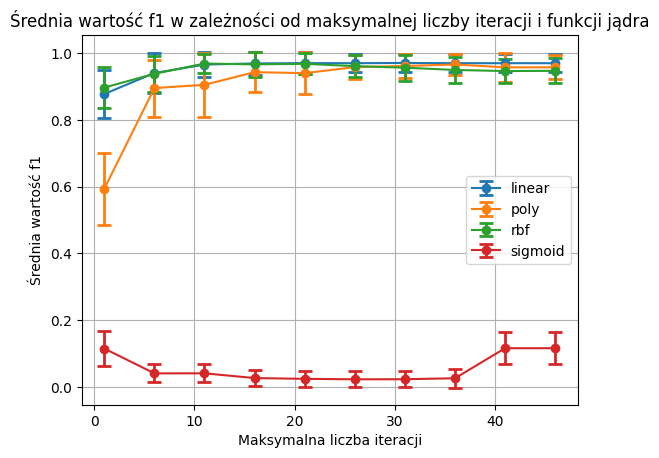

In [211]:
import matplotlib.pyplot as plt

plt.grid()
# Plot results for each splitter
for kernel_value in PARAMETERS['kernel']:
    kernel_data = summary_df[summary_df['Kernel'] == kernel_value]
    f1_data = kernel_data[kernel_data['Quality Metric'] == 'f1']
    print(f1_data)
    f1_data = f1_data.groupby(['Kernel', 'Max iter']).agg({'Mean': 'mean', 'Std Dev': 'mean'})
    plt.errorbar(f1_data.index.get_level_values('Max iter'), f1_data['Mean'], yerr=f1_data['Std Dev'], label=f'{kernel_value}', fmt="-o",
                capsize=5,
                capthick=2,
                elinewidth=2,)

# Add labels and legend
plt.xlabel('Maksymalna liczba iteracji')
plt.ylabel('Średnia wartość f1')
plt.title('Średnia wartość f1 w zależności od maksymalnej liczby iteracji i funkcji jądra')
plt.legend()

# Show the plot
plt.show()